In [7]:
# 1. 라이브러리 불러오기
import pandas as pd
import statsmodels.formula.api as smf

# 2. 엑셀 파일 불러오기
file_path = "코스피제외_before수정완료_밸류업참여변경_2023+2024매칭결과.xlsx"
df = pd.read_excel(file_path)

# 3. 컬럼 이름 간편화 (영문으로 rename)
df = df.rename(columns={
    '밸류업 참여 여부': 'Treat',
    'After': 'After',
    '코스피': 'KOSPI',
    '밸류업 지수 참여 여부': 'Index'
})

# 4. 상호작용항 생성 (DID 핵심 변수)
df['Treat_After'] = df['Treat'] * df['After']


In [8]:
# ROE 변수명으로 변환
df = df.rename(columns={
    '[공통]자기자본순이익률(IFRS)': 'ROE'
})


outcomes = ['PBR', 'TSR', 'ROE']

for var in outcomes:
    model = smf.ols(f"{var} ~ Treat + After + Treat_After + KOSPI + Index", data=df).fit()
    print(f"\n===== 결과: {var} =====")
    print(model.summary())



===== 결과: PBR =====
                            OLS Regression Results                            
Dep. Variable:                    PBR   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.476
Date:                Fri, 06 Jun 2025   Prob (F-statistic):             0.0324
Time:                        09:00:34   Log-Likelihood:                -704.30
No. Observations:                 288   AIC:                             1421.
Df Residuals:                     282   BIC:                             1443.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.6669      0

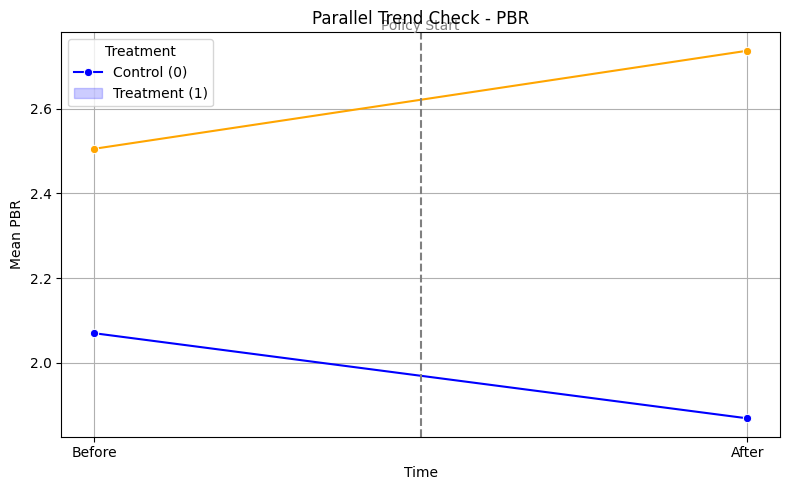

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Excel file
file_path = "코스피제외_before수정완료_밸류업참여변경_2023+2024매칭결과.xlsx"
df = pd.read_excel(file_path)

# 2. Rename columns to English
df = df.rename(columns={
    '밸류업 참여 여부': 'Treat',
    'After': 'After',
    '밸류업 지수 참여 여부': 'Index',
    '코스피': 'KOSPI',
    '[공통]자기자본순이익률(IFRS)': 'ROE',
    'PBR': 'PBR',
    'TSR': 'TSR'
})

# 3. Choose outcome variable (e.g., 'PBR', 'ROE', 'TSR')
outcome = 'PBR'

# 4. Group by Treat and After, compute mean
plot_df = df.groupby(['Treat', 'After'])[outcome].mean().reset_index()

# 5. Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=plot_df, x='After', y=outcome, hue='Treat', marker='o', palette={0: 'blue', 1: 'orange'})

# 6. Add vertical policy line
plt.axvline(x=0.5, color='gray', linestyle='--', label='Policy Implementation')
plt.text(0.5, plot_df[outcome].max() + 0.05, 'Policy Start', ha='center', color='gray')

# 7. Labels and legend
plt.title(f"Parallel Trend Check - {outcome}")
plt.xticks([0, 1], ['Before', 'After'])
plt.xlabel("Time")
plt.ylabel(f"Mean {outcome}")
plt.legend(title='Treatment', labels=['Control (0)', 'Treatment (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()


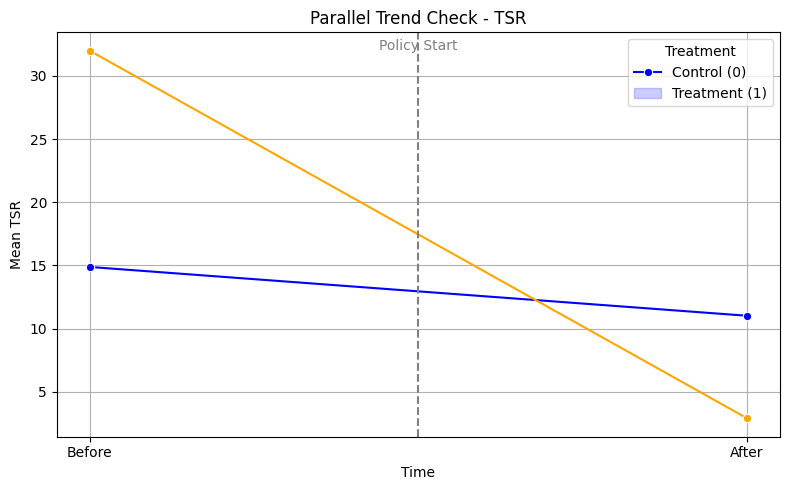

In [10]:
# 3. Choose outcome variable (e.g., 'PBR', 'ROE', 'TSR')
outcome = 'TSR'

# 4. Group by Treat and After, compute mean
plot_df = df.groupby(['Treat', 'After'])[outcome].mean().reset_index()

# 5. Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=plot_df, x='After', y=outcome, hue='Treat', marker='o', palette={0: 'blue', 1: 'orange'})

# 6. Add vertical policy line
plt.axvline(x=0.5, color='gray', linestyle='--', label='Policy Implementation')
plt.text(0.5, plot_df[outcome].max() + 0.05, 'Policy Start', ha='center', color='gray')

# 7. Labels and legend
plt.title(f"Parallel Trend Check - {outcome}")
plt.xticks([0, 1], ['Before', 'After'])
plt.xlabel("Time")
plt.ylabel(f"Mean {outcome}")
plt.legend(title='Treatment', labels=['Control (0)', 'Treatment (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()


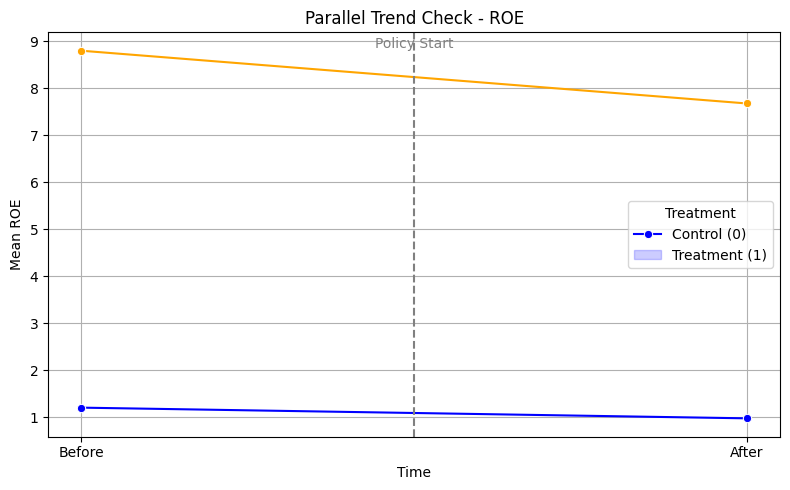

In [5]:
# 3. Choose outcome variable (e.g., 'PBR', 'ROE', 'TSR')
outcome = 'ROE'

# 4. Group by Treat and After, compute mean
plot_df = df.groupby(['Treat', 'After'])[outcome].mean().reset_index()

# 5. Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=plot_df, x='After', y=outcome, hue='Treat', marker='o', palette={0: 'blue', 1: 'orange'})

# 6. Add vertical policy line
plt.axvline(x=0.5, color='gray', linestyle='--', label='Policy Implementation')
plt.text(0.5, plot_df[outcome].max() + 0.05, 'Policy Start', ha='center', color='gray')

# 7. Labels and legend
plt.title(f"Parallel Trend Check - {outcome}")
plt.xticks([0, 1], ['Before', 'After'])
plt.xlabel("Time")
plt.ylabel(f"Mean {outcome}")
plt.legend(title='Treatment', labels=['Control (0)', 'Treatment (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()


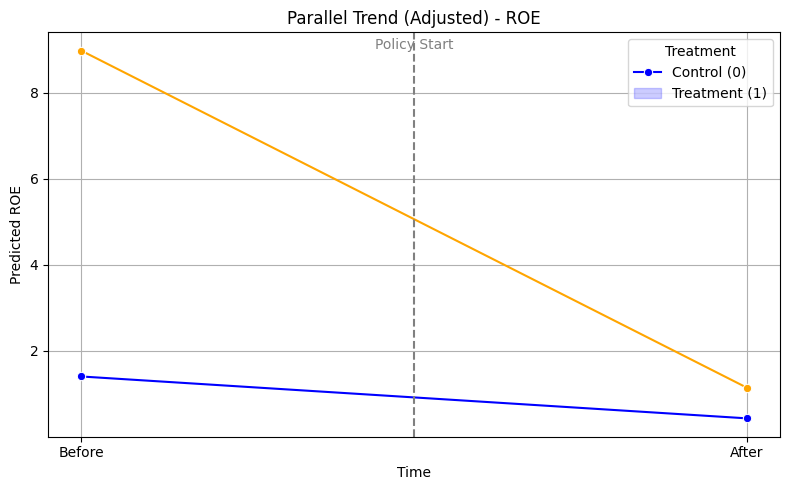